In [43]:
import pandas as pd
import numpy as np
import random
import sys
import pickle
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
from matplotlib import font_manager, rc
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import joblib
import warnings
from ydata_profiling import ProfileReport
warnings.filterwarnings(action='ignore')

In [3]:
# 데이터 로드
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Ticket

In [5]:
df['Ticket'].value_counts().index

Index(['347082', 'CA. 2343', '1601', '3101295', 'CA 2144', '347088',
       'S.O.C. 14879', '382652', 'LINE', 'PC 17757',
       ...
       '347470', '349243', '250651', 'A/5 2466', '226593', '9234', '19988',
       '2693', 'PC 17612', '370376'],
      dtype='object', length=681)

In [6]:
df['Ticket'].value_counts().values

array([7, 7, 7, 6, 6, 6, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [7]:
dic = dict(zip(df['Ticket'].value_counts().index, df['Ticket'].value_counts().values))

In [8]:
df['Passengers'] = df['Ticket'].replace(dic)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passengers
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1


In [10]:
df['Passengers'].unique()

array([1, 2, 4, 3, 7, 5, 6])

In [11]:
df[df['Passengers'] == 7].groupby('Ticket').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Passengers
Ticket,,,,,,,,,,,,
1601,7,7,7,7,7,4,7,7,7,0,7,7
347082,7,7,7,7,7,7,7,7,7,0,7,7
CA. 2343,7,7,7,7,7,0,7,7,7,0,7,7


In [12]:
df['Passengers'].value_counts()

1    547
2    188
3     63
4     44
7     21
6     18
5     10
Name: Passengers, dtype: int64

Text(0, 0.5, '생존율')

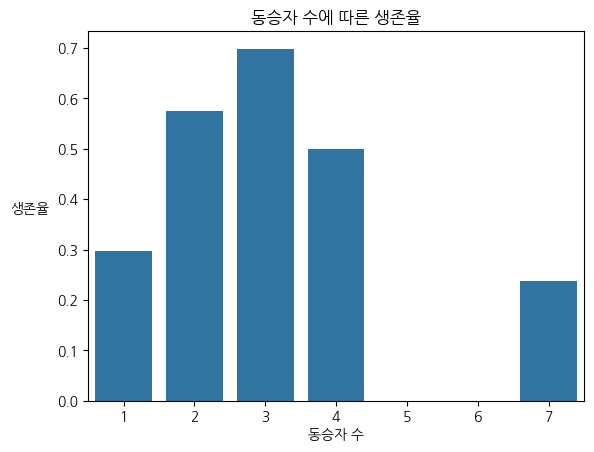

In [60]:
ax = plt.subplots()
ax = sns.barplot(x = 'Passengers', y = 'Survived', data = df, ci = None, color = '#1f77b4')
ax.set_title('동승자 수에 따른 생존율')
ax.set_xlabel('동승자 수')
ax.set_ylabel('생존율', rotation = 0, labelpad= 20)

Text(0, 0.5, '티켓 가격')

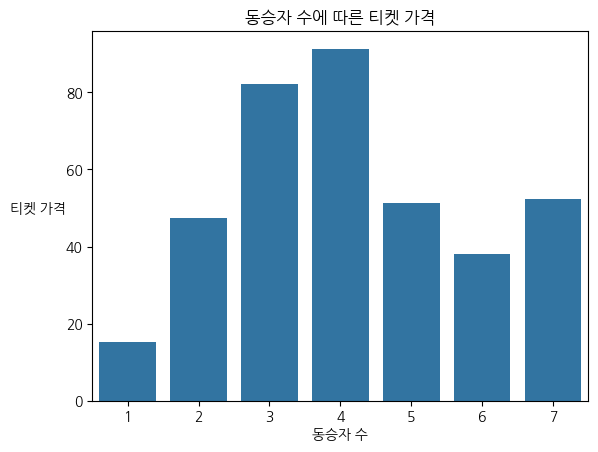

In [59]:
ax = plt.subplots()
ax = sns.barplot(x = 'Passengers', y = 'Fare', data = df, ci = None, color = '#1f77b4')
ax.set_title('동승자 수에 따른 티켓 가격')
ax.set_xlabel('동승자 수')
ax.set_ylabel('티켓 가격', rotation = 0, labelpad= 20)

Text(0, 0.5, 'Pclass')

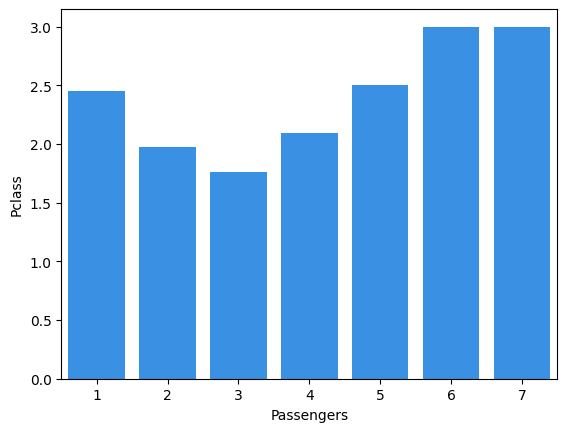

In [25]:
ax = plt.subplots()
ax = sns.barplot(x = 'Passengers', y = 'Pclass', data = df, ci = None, color = 'dodgerblue')
# ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Passengers')
ax.set_ylabel('Pclass')

Text(0, 0.5, 'Sex')

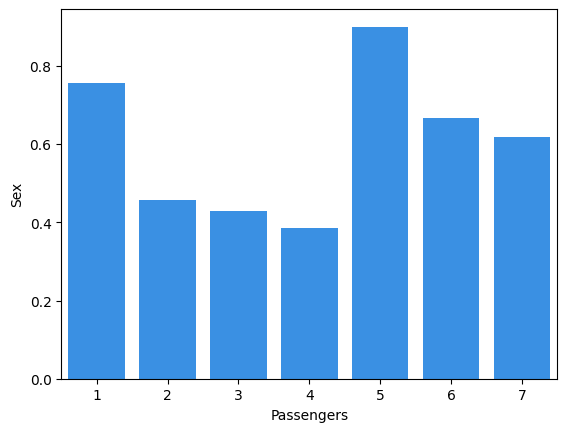

In [28]:
ax = plt.subplots()
ax = sns.barplot(x = 'Passengers', y = 'Sex', data = df, ci = None, color = 'dodgerblue')
# ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Passengers')
ax.set_ylabel('Sex')

# Fare

In [52]:
# 선원?? 무임승차??
df[df['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passengers
179,180,0,3,"Leonard, Mr. Lionel",1,36.0,0,0,LINE,0.0,NaN,S,4
263,264,0,1,"Harrison, Mr. William",1,40.0,0,0,112059,0.0,B94,S,1
271,272,1,3,"Tornquist, Mr. William Henry",1,25.0,0,0,LINE,0.0,NaN,S,4
277,278,0,2,"Parkes, Mr. Francis ""Frank""",1,NaN,0,0,239853,0.0,NaN,S,3
302,303,0,3,"Johnson, Mr. William Cahoone Jr",1,19.0,0,0,LINE,0.0,NaN,S,4
413,414,0,2,"Cunningham, Mr. Alfred Fleming",1,NaN,0,0,239853,0.0,NaN,S,3
466,467,0,2,"Campbell, Mr. William",1,NaN,0,0,239853,0.0,NaN,S,3
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",1,NaN,0,0,239854,0.0,NaN,S,1
597,598,0,3,"Johnson, Mr. Alfred",1,49.0,0,0,LINE,0.0,NaN,S,4
633,634,0,1,"Parr, Mr. William Henry Marsh",1,NaN,0,0,112052,0.0,NaN,S,1


Text(0, 0.5, 'Fare')

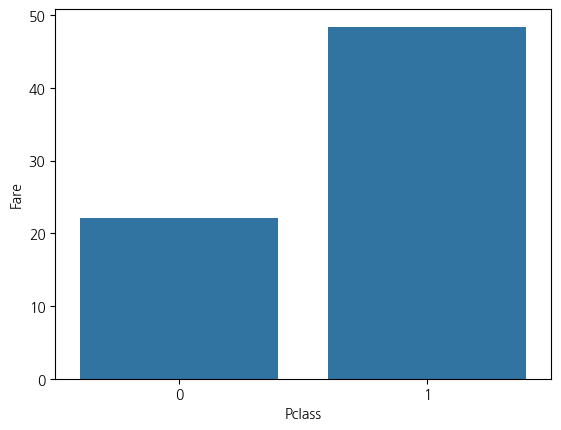

In [50]:
ax = plt.subplots()
ax = sns.barplot(x = 'Survived', y = 'Fare', data = df, ci = None, color = '#1f77b4')
# ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Pclass')
ax.set_ylabel('Fare')

Text(0, 0.5, '티켓 가격')

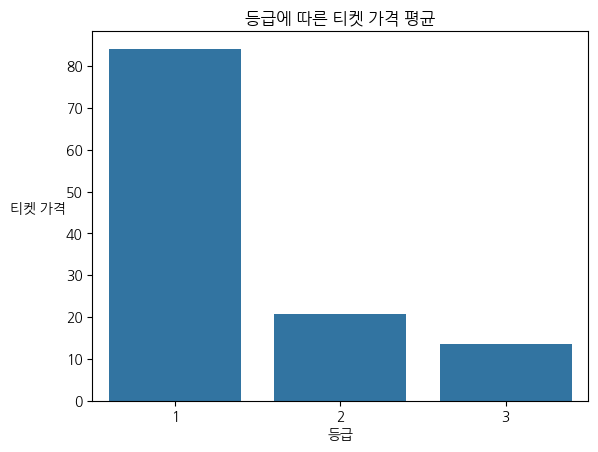

In [61]:
ax = plt.subplots()
ax = sns.barplot(x = 'Pclass', y = 'Fare', data = df, ci = None, color = '#1f77b4')
ax.set_title('등급에 따른 티켓 가격 평균')
ax.set_xlabel('등급')
ax.set_ylabel('티켓 가격', rotation = 0, labelpad= 20)

Text(0, 0.5, 'Fare')

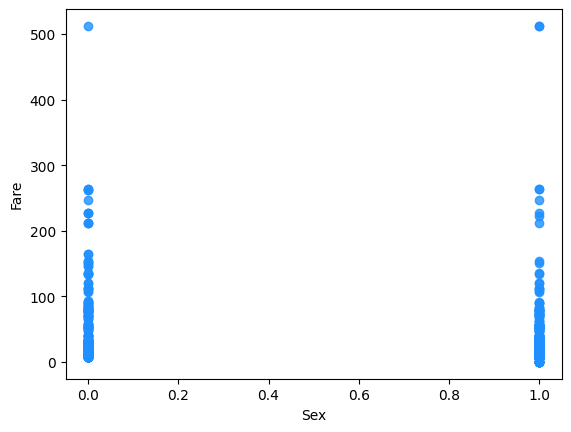

In [30]:
ax = plt.subplots()
ax = sns.regplot(x = 'Sex', y = 'Fare', data=df, fit_reg = False, color = 'dodgerblue')
# ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Sex')
ax.set_ylabel('Fare')

Text(0, 0.5, 'Age')

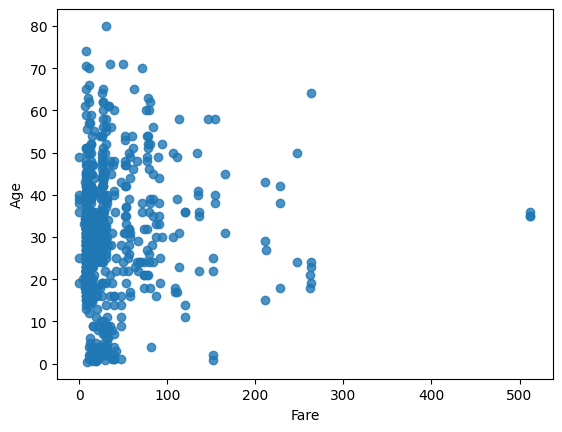

In [30]:
ax = plt.subplots()
ax = sns.regplot(x = 'Fare', y = 'Age', data=df, fit_reg = False)
# ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Fare')
ax.set_ylabel('Age')

# Cabin (Deck)

- Cabin(객실)의 앞 글자가 Deck를 의미함
- Deck란 배의 층수를 의미함
- A가 최상층을 의미하며 G로 갈 수록 아래층을 의미함
- A Deck
    - 산책로 갑판이라고 불림
    - 1등실 승객들의 객실, 라운지, 산책로, 흡연실, 독서실, 아트리움 등이 있었으며 1등실 승객들 만을 위한 층
- B Deck
    - 1등실 중에서도 개인 산책로가 설치된 고급 객실들이 주로 있음
    - 1등실 승객들에게 럭셔리한 식사를 제공하는 레스토랑이 있음
    - 2등실 승객들의 흠연실과 3등실 승객들의 산책로로도 사용되었으며 타이타닉이 침몰할 당시 많은 탑승객들이 마지막까지 머물렀던 곳
- C Deck
    - 선수와 선미까지 길게 이어진 공간으로 선수에는 3등실 승객들의 산책로와 선원들의 숙소가, 선미에는 3등실 승객들의 라운지가 있었음
    - 1등실의 대다수 객실과 2등실의 도서관도 있었음
- D Deck
    - 크게 1등실 연회실, 당체식당, 2등실 식당으로 구성
    - 1, 2등실 객실, 3등실 공용공간 소방관들의 숙소가 있었음
- E Deck
    - 2등실 승객들과 선원들의 객실이 차지하는 비중이 높았음
- F Deck
    - 2, 3등실 객실과 일부 선원 생활공간, 3등실 식당, 수영장, 터키식 목욕탕, 개와 고양이 등 반려동물들을 위한 우리도 있었음
- G Deck
    - 선원 및 승객들이 사용할 수 있는 공간 중에서 가장 낮은 층으로 수면 바로 위에 위치했음
    - 1등실 승객들을 위한 스쿼시 코트와 이동식 우체국이 운영되었음
    - 식재료 보관소도 있었음

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passengers
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1


In [38]:
li = []
for i in df['Cabin']:
    if i is np.nan:
        li.append(np.nan)
    else:
        li.append(i[0])

df['Deck'] = li

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passengers,Deck
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2,C
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,NaN


In [40]:
df[df['Fare'] >= df['Fare'].mean()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passengers,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2,C
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,1,E
23,24,1,1,"Sloper, Mr. William Thompson",1,28.0,0,0,113788,35.5000,A6,S,1,A
27,28,0,1,"Fortune, Mr. Charles Alexander",1,19.0,3,2,19950,263.0000,C23 C25 C27,S,4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",0,45.0,1,1,36928,164.8667,NaN,S,2,NaN
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",0,NaN,8,2,CA. 2343,69.5500,NaN,S,7,NaN
867,868,0,1,"Roebling, Mr. Washington Augustus II",1,31.0,0,0,PC 17590,50.4958,A24,S,1,A
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",0,47.0,1,1,11751,52.5542,D35,S,2,D


# Embarked

- S(Southampton, 영국) -> C(Cherbourg, 프랑스) -> Q(Queenstown, 아일랜드) -> New York

In [6]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [78]:
print('최소값 : ', df[df['Embarked'] == 'S'].Fare.min())
print('평균값 : ', df[df['Embarked'] == 'S'].Fare.mean())
print('중앙값 : ', df[df['Embarked'] == 'S'].Fare.median())
print('최빈값 : ', df[df['Embarked'] == 'S'].Fare.mode())
print('최대값 : ', df[df['Embarked'] == 'S'].Fare.max())

최소값 :  0.0
평균값 :  27.079811801242233
중앙값 :  13.0
최빈값 :  0    8.05
Name: Fare, dtype: float64
최대값 :  263.0


In [83]:
df[df['Fare'] == 0].sort_values('Passengers')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passengers
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,1
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,1
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,1
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,NaN,S,1
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,NaN,S,1
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,1
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S,1
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,1
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,3
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,3


In [80]:
print('최소값 : ', df[df['Embarked'] == 'C'].Fare.min())
print('평균값 : ', df[df['Embarked'] == 'C'].Fare.mean())
print('중앙값 : ', df[df['Embarked'] == 'C'].Fare.median())
print('최빈값 : ', df[df['Embarked'] == 'C'].Fare.mode())
print('최대값 : ', df[df['Embarked'] == 'C'].Fare.max())

최소값 :  4.0125
평균값 :  59.95414404761905
중앙값 :  29.7
최빈값 :  0    7.2292
Name: Fare, dtype: float64
최대값 :  512.3292


In [79]:
print('최소값 : ', df[df['Embarked'] == 'Q'].Fare.min())
print('평균값 : ', df[df['Embarked'] == 'Q'].Fare.mean())
print('중앙값 : ', df[df['Embarked'] == 'Q'].Fare.median())
print('최빈값 : ', df[df['Embarked'] == 'Q'].Fare.mode())
print('최대값 : ', df[df['Embarked'] == 'Q'].Fare.max())

최소값 :  6.75
평균값 :  13.276029870129872
중앙값 :  7.75
최빈값 :  0    7.75
Name: Fare, dtype: float64
최대값 :  90.0


In [43]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Text(0, 0.5, '등급')

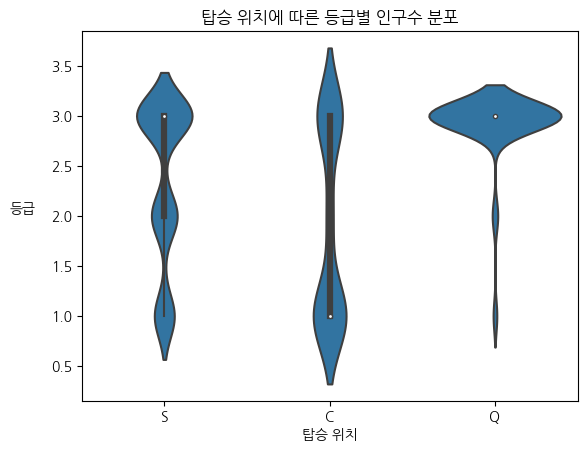

In [64]:
ax = plt.subplots()
ax = sns.violinplot(x = 'Embarked', y = 'Pclass', data = df, color = '#1f77b4')
ax.set_title('탑승 위치에 따른 등급별 인구수 분포')
ax.set_xlabel('탑승 위치')
ax.set_ylabel('등급', rotation = 0, labelpad= 20)

Text(0, 0.5, 'Survived')

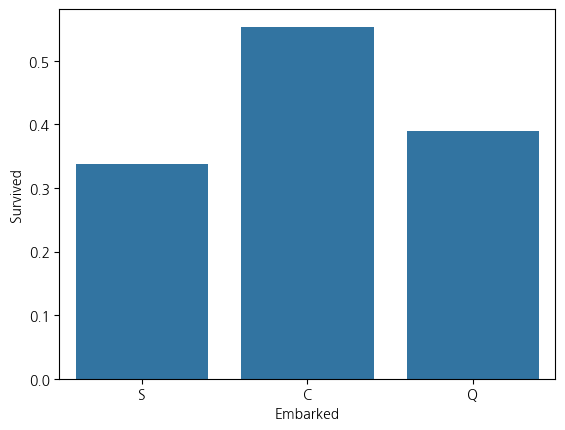

In [62]:
ax = plt.subplots()
ax = sns.barplot(x = 'Embarked', y = 'Survived', data = df, ci = None, color = '#1f77b4')
# ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Embarked')
ax.set_ylabel('Survived')

Text(0, 0.5, 'Survived')

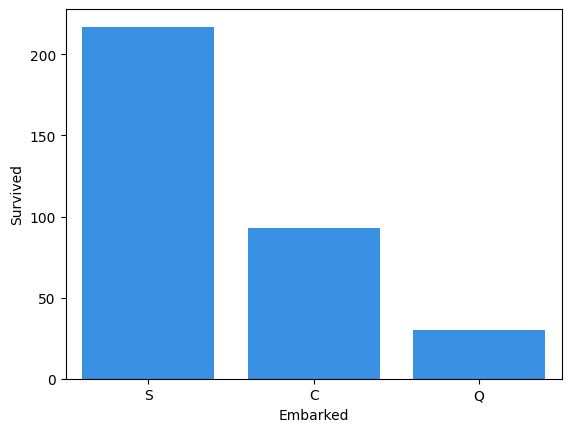

In [33]:
ax = plt.subplots()
ax = sns.barplot(x = 'Embarked', y = 'Survived', data = df, ci = None, estimator = 'sum', color = 'dodgerblue')
# ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Embarked')
ax.set_ylabel('Survived')

Text(0, 0.5, 'Fare')

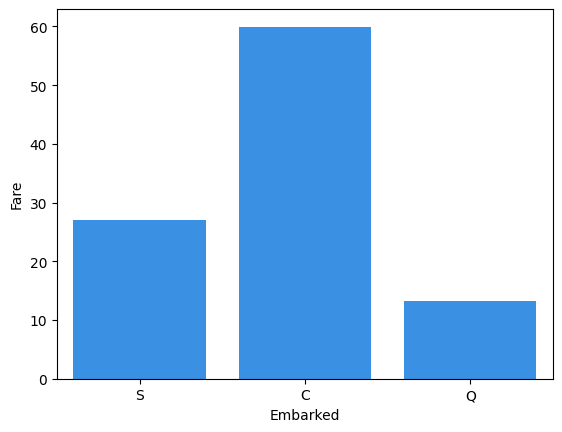

In [34]:
ax = plt.subplots()
ax = sns.barplot(x = 'Embarked', y = 'Fare', data = df, ci = None, color = 'dodgerblue')
# ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Embarked')
ax.set_ylabel('Fare')

In [ ]:
# S(644) > C(168) > Q(77) 순서로 많이 탐

# C > S > Q 순서로 높은 등급 비율이 높음 -> Q에서는 대부분이 3등급 계층
# S에서 3 > 2 > 1 등급 순으로 등급이 낮아질 수록 인원이 증가
# C에서는 1등급 아니면 3등급이 주를 이루며 2등급은 거의 없음
# Q에서는 대부분이 3등급임

# 생존자 수는 S > C > Q 순으로 많이 탄 순서와 같음
# 생존율은 C > Q > S 순으로 1등급이 가장 많은 C에서 탄 사람이 생존율이 높음

# C에서 탄 사람들의 티켓 값이 가장 큼
# C에서 1등급 계층이 많이 탑승함 -> 좋은 방을 골랐을 확률이 높음 -> 티켓 값이 비쌈

In [ ]:
ax = plt.subplots()
ax = sns.barplot(x = 'Embarked', y = 'Fare', data = df, ci = None, estimator = max)
# ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Embarked')
ax.set_ylabel('Fare')